In [16]:
import os
# import badger
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [17]:
fpath = '/Users/darshika/Desktop/Research/SOM_N_of_Z/K1000_NS_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2' +\
        '_SOMcols_Fid_blindC_TOMO{}_Nz.asc'
fpath = os.path.join(fpath)
table_n = Table()
table_n['z'] = np.genfromtxt(fpath.format(1))[:, 0] + 0.025
table_n['n'] = np.vstack(
    [np.genfromtxt(fpath.format(i + 1))[:, 1] for i in range(5)]).T

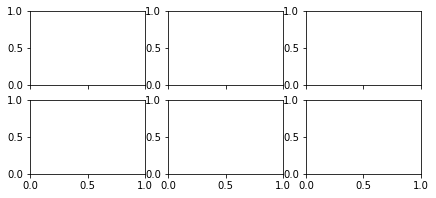

In [18]:
table_c = Table.read(os.path.join('/Users/darshika/Desktop/Research/som-data/trial_4/final/kids_c_0.fits'))
fig, axarr = plt.subplots(nrows=2, ncols=3, figsize=(7, 3), sharex=True)
axarr = axarr.flatten()

Z_BINS = {'kids': [0.1, 0.3, 0.5, 0.7, 0.9, 1.2]}

In [19]:
for i in range(5):

    if i < 2:
        ax = axarr[i]
    else:
        ax = axarr[i + 1]

    use = ((table_c['z'] > Z_BINS['kids'][i]) &
           (table_c['z'] <= Z_BINS['kids'][i+1]))

    n,bins,patches = ax.hist(table_c['z_true'][use], weights=table_c['w'][use] *
            table_c['w_sys'][use],
            bins=table_n['z'] - np.diff(table_n['z'])[0] / 2.0,
            histtype='step', density=True) #something here i need to change
    
    ax.plot(table_n['z'], table_n['n'][:, i] / np.diff(table_n['z'])[0])
    ax.set_xlim(0, 1.8)
    print('Tomographic bin {}'.format(i + 1))
    print('<z>: {:.3f} vs. {:.3f}'.format(
        np.average(table_n['z'], weights=table_n['n'][:, i]),
        np.average(table_c['z_true'][use], weights=table_c['w'][use] *
                   table_c['w_sys'][use])))
    ax.set_yticks([])
    if i >= 2:
        ax.set_xlabel(r'Redshift $z$')
    ax.text(0.95, 0.95, r'${:.1f} < z_B \leq {:.1f}$'.format(
                Z_BINS['kids'][i], Z_BINS['kids'][i+1]),
            transform=ax.transAxes, ha='right', va='top')


Tomographic bin 1
<z>: 0.257 vs. 0.478
Tomographic bin 2
<z>: 0.403 vs. 0.517
Tomographic bin 3
<z>: 0.564 vs. 0.698
Tomographic bin 4
<z>: 0.792 vs. 0.868
Tomographic bin 5
<z>: 0.984 vs. 1.053


In [24]:
print(bins)

[-3.46944695e-18  5.00000000e-02  1.00000000e-01  1.50000000e-01
  2.00000000e-01  2.50000000e-01  3.00000000e-01  3.50000000e-01
  4.00000000e-01  4.50000000e-01  5.00000000e-01  5.50000000e-01
  6.00000000e-01  6.50000000e-01  7.00000000e-01  7.50000000e-01
  8.00000000e-01  8.50000000e-01  9.00000000e-01  9.50000000e-01
  1.00000000e+00  1.05000000e+00  1.10000000e+00  1.15000000e+00
  1.20000000e+00  1.25000000e+00  1.30000000e+00  1.35000000e+00
  1.40000000e+00  1.45000000e+00  1.50000000e+00  1.55000000e+00
  1.60000000e+00  1.65000000e+00  1.70000000e+00  1.75000000e+00
  1.80000000e+00  1.85000000e+00  1.90000000e+00  1.95000000e+00
  2.00000000e+00  2.05000000e+00  2.10000000e+00  2.15000000e+00
  2.20000000e+00  2.25000000e+00  2.30000000e+00  2.35000000e+00
  2.40000000e+00  2.45000000e+00  2.50000000e+00  2.55000000e+00
  2.60000000e+00  2.65000000e+00  2.70000000e+00  2.75000000e+00
  2.80000000e+00  2.85000000e+00  2.90000000e+00  2.95000000e+00
  3.00000000e+00  3.05000

In [20]:
#trying to see the index of each value we are plotting is which bin
np.digitize(table_n['n'][:,i], bins)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
axarr[2].axis('off')

plt.tight_layout(pad=0.3)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('kids_nz.pdf')
plt.savefig('kids_nz.png', dpi=300)



<Figure size 432x288 with 0 Axes>